In [4]:
# Import libraries

import re
import json
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Define personality types

personalities = [
    'ENFJ',
    'ENFP',
    'ENTJ',
    'ENTP',
    'ESFJ',
    'ESFP',
    'ESTJ',
    'ESTP',
    'INFJ',
    'INFP',
    'INTJ',
    'INTP',
    'ISFJ',
    'ISFP',
    'ISTJ',
    'ISTP',
    ]

In [62]:
# Set variables

# Number of words we want to consider in the study
n_common_words = 50

# Word Lemmatizer
wnl = WordNetLemmatizer()

# English Stopwords
engstopwords = stopwords.words('english')

# Add stopwords that doesn't contain punctuations such 'wasnt, hasnt, iam'
engstopwordsV2 = re.sub('[' + re.escape(string.punctuation) + ']', '',
                        ' '.join(engstopwords)).split()

# Additional stopwords : non-effective words & some words that are common for all personality types
with open("additional-stopwords.json") as file:
    additional_stopwords = json.load(file)

# Add additional stopwords
engstopwords.extend(additional_stopwords)


# Combine all stopwords
engstopwords = set(engstopwords).union(set(engstopwordsV2))

# Punctuations
str_punc = string.punctuation

# Dataset filename
filename = 'mbti_1.csv'

# Initiate count vectorizer and apply it to the text
cv = CountVectorizer(stop_words='english')

# Dots Per Inch setting
plt.rcParams['figure.dpi'] = 300

# Word cloud with options
wc = WordCloud(stopwords=engstopwords, background_color='white',
               colormap='Dark2', max_font_size=150, random_state=42,width=800, height=400)

In [7]:
# Read data set

dataset = pd.read_csv(filename)

# Group texts by personality type to combine all
# text samples of a single personality type in one single row
dataset = dataset.groupby(['type'])['posts'].apply(lambda x: \
        '. '.join(x)).reset_index()

dataset.head(16)

,type,posts
0,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
1,ENFP,"'He doesn't want to go on the trip without me,..."
2,ENTJ,'You're fired.|||That's another silly misconce...
3,ENTP,'I'm finding the lack of me in these posts ver...
4,ESFJ,'Why not?|||Any other ESFJs originally mistype...
5,ESFP,'Edit: I forgot what board this was on.|||I am...
6,ESTJ,"this is such a catch 22 |||I'm here! Although,..."
7,ESTP,Splinter Cell Blacklist for Xbox 360.|||ESTPs ...
8,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
9,INFP,'I think we do agree. I personally don't consi...


In [8]:
# Function to lemmatize a word using the three types: adjective, verb, noun
def lemmatize_all_types(word):
    word = wnl.lemmatize(word, 'a')
    word = wnl.lemmatize(word, 'v')
    word = wnl.lemmatize(word, 'n')
    return word

# Function to clean text
def clean(text):
    # Remove URLs from text
    text = re.sub("http.*?([ ]|\|\|\||$)", "", text).lower()
    # Remove specific punctuation (usually associated with a word)
    text = re.sub(r"(:|;).", "", text)
    # Remove punctuations
    text = re.sub('['+re.escape(str_punc)+']',"",  text)
    # Remove parantheses, brackets
    text = re.sub('(\[|\()*\d+(\]|\))*', '', text)
    # Remove string marks
    text = re.sub('[’‘“\.”…–]', '', text)
    # Check that each word is not stopword, and lemmatize it
    text = list(map(lemmatize_all_types, text.split()))
    text = [word for word in text if (word not in engstopwords)]
    text = " ".join(text)
    return text

In [9]:
# Apply text cleaning
dataset.posts = pd.Series(dataset.posts.apply(clean))

# Set personality types as the index
dataset.index = dataset["type"]

In [32]:
# Apply Count Vectorizer

posts_vectorized = cv.fit_transform(dataset.posts)

# convert Vectorized text DTM (Document Term Matrix)
dtm = pd.DataFrame(data=posts_vectorized.toarray(), columns=cv.get_feature_names())

# Set its index to personality types
dtm.index = dataset['type']

In [33]:
# Visualize Document Term Matrix
dtm.iloc[:, -20000:-20016:-1]

,waccording,wabisabi,wabi,wabbly,waayyy,waayy,waay,waarvan,waanyi,waant,waahwums,waaayyyy,waaayyy,waaayyou,waaayy,waaay
type,,,,,,,,,,,,,,,,
ENFJ,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
ENFP,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,1
ENTJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ENTP,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
ESFJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESFP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESTJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESTP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
INFJ,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,8


In [34]:
# Transpose the Document Term Matrix, so we can sort the rows (words)
dtmT = dtm.transpose()

In [38]:
# Visualize DTM Transposed
dtmT.iloc[-20000:-20016:-1, :]

type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
waccording,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
wabisabi,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
wabi,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
wabbly,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
waayyy,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
waayy,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
waay,0,3,0,0,0,0,0,0,1,5,1,0,0,0,1,1
waarvan,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
waanyi,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
waant,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# Get Top 50 words

cloud = []
# cloud will store 16 dict, each one has a key (personality type)
# and value (list of most used words by this personality type)

# Loop over columns (words), sort them, select top 50, append them with a key (personality type)
for personality in dtmT.columns:
    topWords = list(dtmT[personality].sort_values(ascending=False).head(n_common_words).index)
    cloud.append({personality: topWords})

In [59]:
# Visualize a single cloud
cloud[11]

{'INTP': ['life',
  'understand',
  'idea',
  'question',
  'believe',
  'mind',
  'problem',
  'reason',
  'different',
  'help',
  'world',
  'quite',
  'school',
  'play',
  'write',
  'relationship',
  'hard',
  'experience',
  'happen',
  'sense',
  'learn',
  'great',
  'care',
  'game',
  'answer',
  'new',
  'watch',
  'high',
  'thank',
  'change',
  'enjoy',
  'end',
  'old',
  'hate',
  'social',
  'fact',
  'hear',
  'book',
  'emotion',
  'girl',
  'stuff',
  'definitely',
  'wrong',
  'close',
  'meet',
  'leave',
  'music',
  'relate',
  'woman',
  'human']}

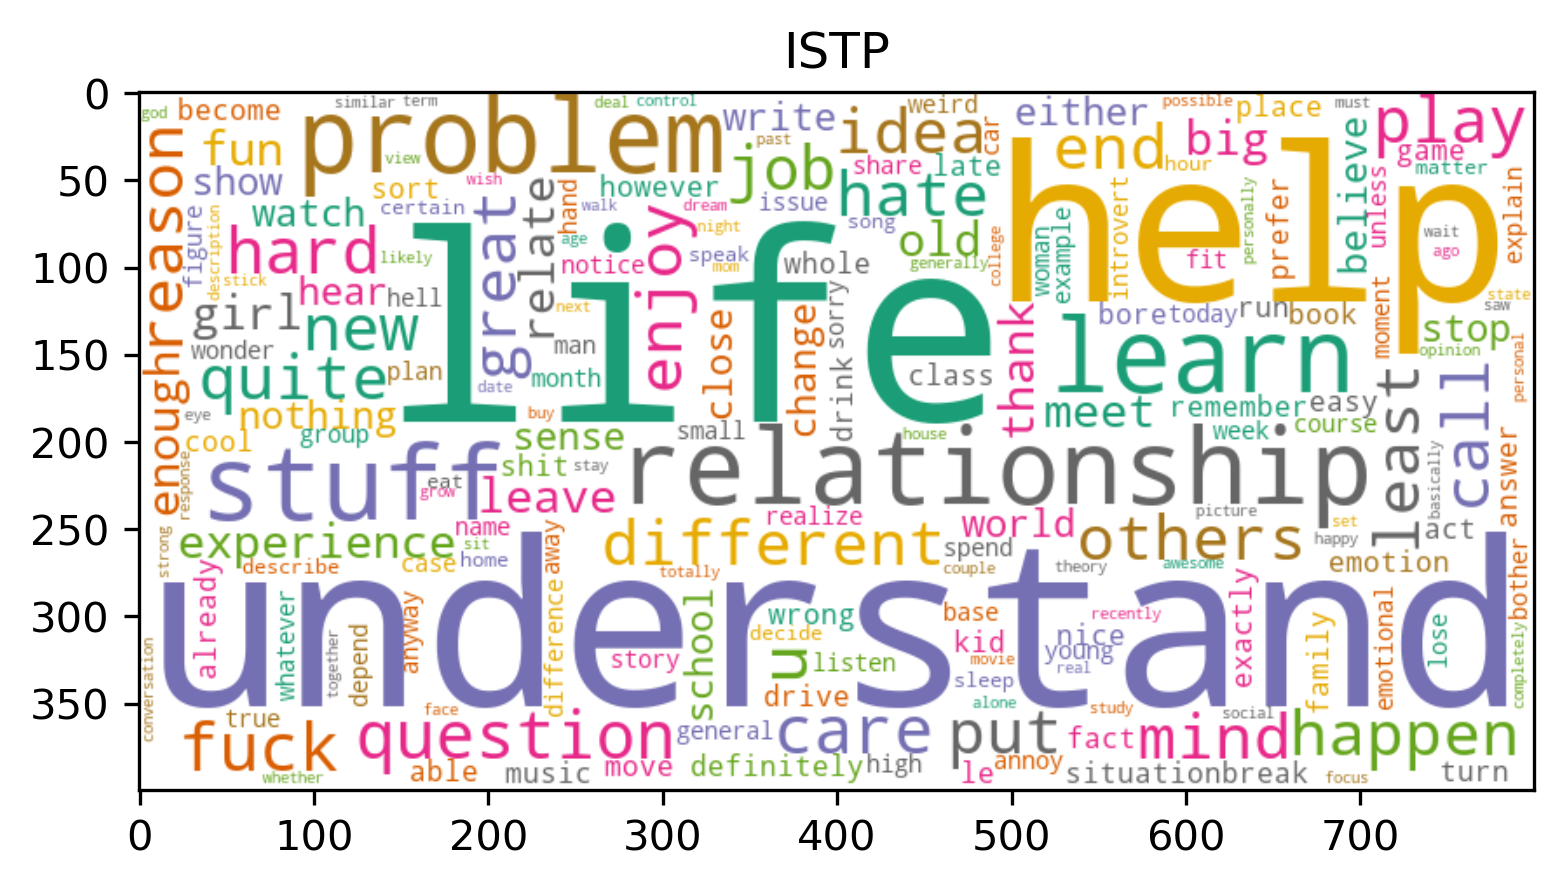

In [63]:
# Generate WordCloud for each personality type
for (index, personality) in enumerate(dtmT.columns):
    wc.generate(dataset.posts[personality])
    plt.imshow(wc, interpolation='bilinear')
    plt.title(personality)
    plt.savefig(personality + '.png')

In [67]:
# Find common.common words (same common words for same personality types)

n_of_types = 15
shared_words = []
# If a word is shared between (n_of_types) or more personality types, add it to shared_words


# Collect all words
all_words = []
for index, personality in enumerate(dtmT.columns):
     all_words.append(cloud[index][personality])

        
# Get unique words
unique_words = np.unique(np.array(all_words))

# loop over each common word, check if it appears for (n_of_types) or more
for word in unique_words:
     counter = 0
     for index, personality in enumerate(dtmT.columns):
         if word in cloud[index][personality]:
             counter += 1
     if counter >= n_of_types:
         shared_words.append(word)

In [68]:
# Shared words can be used to filter the dataset to get
# clearer results (boundaries between types)
# You can add any of these words to file 'additional-stopwords.json'
shared_words

['believe',
 'care',
 'change',
 'close',
 'definitely',
 'different',
 'enjoy',
 'experience',
 'great',
 'hard',
 'hear',
 'help',
 'idea',
 'learn',
 'life',
 'meet',
 'mind',
 'new',
 'play',
 'problem',
 'question',
 'reason',
 'relationship',
 'school',
 'sense',
 'thank',
 'understand',
 'write']